# CrewAI Hands-On: Build an AI Career Coach Agent

Welcome to this hands-on activity!

Today, we'll build an **AI Career Coach Agent** using [CrewAI](https://github.com/joaomdmoura/crewAI). This agent will suggest exciting career paths  based on their interests.

By the end of this notebook, you'll:
- Understand what an AI agent is
- Create a one-agent CrewAI app
- See how AI can help with real-life questions

**Crew AI**


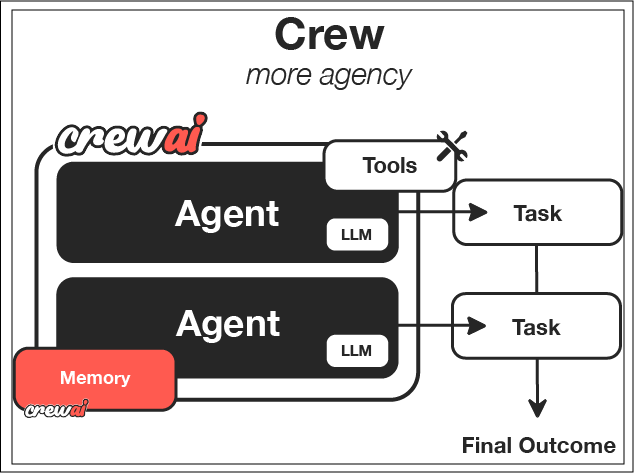

In [1]:
!pip install crewai openai langchain_openai -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 42.8 MB/s e

In [2]:
from crewai import Agent, Task, Crew
from langchain_openai import ChatOpenAI

In [4]:
from google.colab import userdata
open_ai_api=userdata.get('openaiapi')

In [6]:
llm = ChatOpenAI(model='gpt-4o-mini', api_key=open_ai_api)

##  Define the AI Career Coach Agent

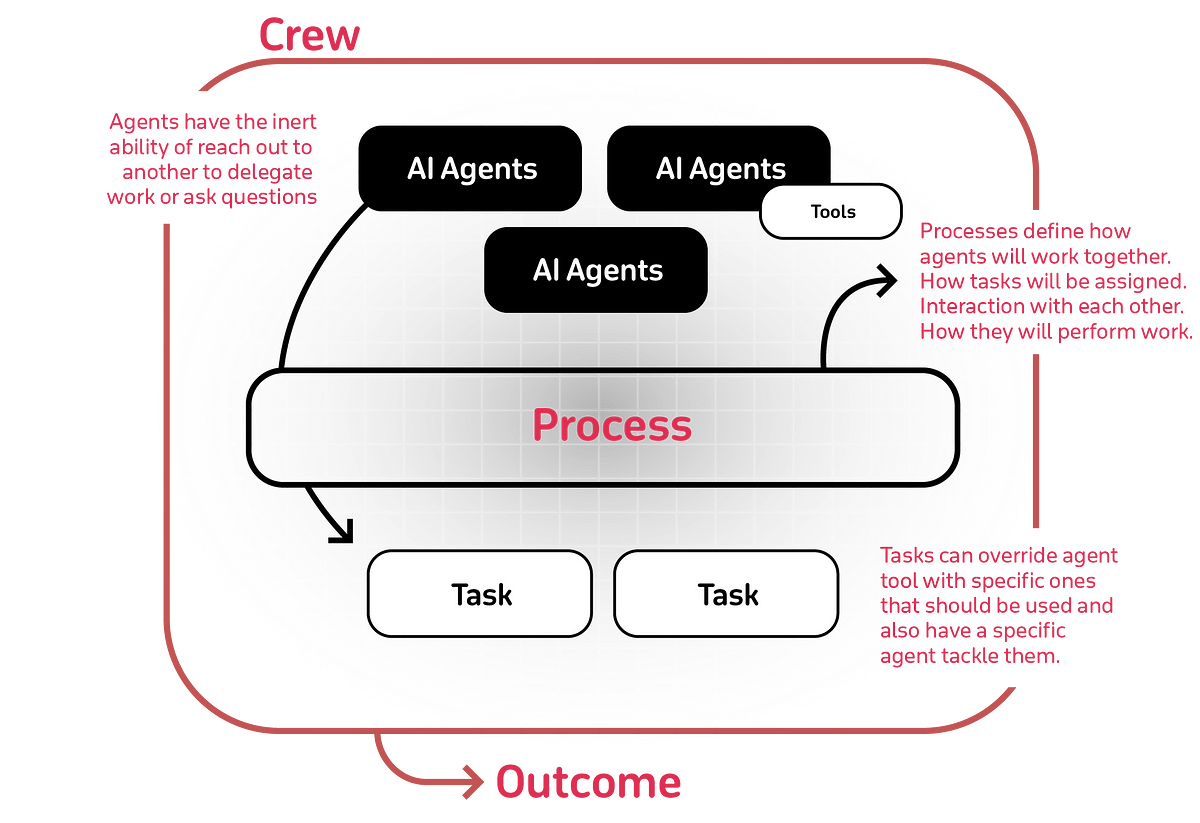

In [11]:
# Career Coach
career_coach = Agent(
    role="Career Coach",
    goal="Suggest a modern and exciting career based on the user's interest",
    backstory="You're an expert in modern careers and love helping adults discover their future.",
    llm=llm
)

#  Motivation Coach
motivation_coach = Agent(
    role="Motivation Coach",
    goal="Inspire the student with encouragement and a first action step",
    backstory="You're a high-energy motivator who pushes students to chase their dreams.",
    llm=llm
)

# Resource Finder
resource_finder = Agent(
    role="Learning Resource Expert",
    goal="Suggest 1-2 beginner-friendly resources to start learning about the career",
    backstory="You're a research genius who finds the best YouTube videos, blog posts, or courses.",
    llm=llm
)

#  Supervisor Agent
supervisor = Agent(
    role="Career Planning Supervisor",
    goal="Review the work of all agents and compile it into a complete final message for the student",
    backstory="You're the wise team leader who combines advice into a single, clear, helpful report.",
    llm=llm
)


In [12]:
interest = input(" What are you interested in? ")

# Task 1 - Career suggestion
task1 = Task(
    description=f"Suggest a modern, exciting career for a teenager interested in '{interest}'. Give one reason why it fits.",
    expected_output="Career name and 1–2 lines of explanation.",
    agent=career_coach
)

# Task 2 - Motivation message
task2 = Task(
    description="Give a motivational quote or message and suggest a first small action step.",
    expected_output="1 quote/message + 1 action step.",
    agent=motivation_coach,
    depends_on=[task1]
)

# Task 3 - Learning resources
task3 = Task(
    description="Find 1–2 beginner-friendly resources (YouTube, blogs, courses) for the career suggested.",
    expected_output="List of 1–2 links or descriptions.",
    agent=resource_finder,
    depends_on=[task1]
)

# Task 4 - Supervisor final summary
task4 = Task(
    description="Take the output from all tasks and write a final message for the student with: career name, motivation, and resources.",
    expected_output="Final 5–6 line message with all outputs combined.",
    agent=supervisor,
    depends_on=[task1, task2, task3]
)


 What are you interested in? gaming


In [14]:
import os
# Set the OpenAI API key as an environment variable
os.environ["OPENAI_API_KEY"] = open_ai_api

crew = Crew(
    agents=[career_coach, motivation_coach, resource_finder, supervisor],
    tasks=[task1, task2, task3, task4],
    manager_llm=llm
)

result = crew.kickoff()
print(" Final AI Career Plan:\n")
print(result)

 Final AI Career Plan:

As you embark on your journey to becoming a **Game Designer**, remember that your creativity can shape the future of gaming! "Believe you can and you're halfway there." —Theodore Roosevelt. Start by sketching a character or level design for a game you’ve imagined; this will kickstart your creative process. To aid your learning, check out the YouTube video on **Game Design Basics** and enroll in the **Introduction to Game Design** course on Coursera. These resources will help you build a solid foundation in game design, paving the way for you to create amazing gaming experiences!
